In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 


In [4]:


url = 'https://raw.githubusercontent.com/Surazz2022/MLproj/main/instadata/instagram_data.csv'
df = pd.read_csv(url)


In [5]:
df.shape

(11692, 14)

In [6]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
print(df["caption"].dtype)


object


In [9]:
df.dropna(subset=["caption"])
df["caption"] = df["caption"].fillna("")  # Replace missing values with empty string


In [10]:
print(df["caption"].dtype)

object


In [11]:
import pandas as pd
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(text):
  """
  This function cleans text data by removing irrelevant characters, converting to lowercase,
  tokenizing, and applying lemmatization.

  Args:
      text (str): The text to be cleaned.

  Returns:
      str: The cleaned text.
  """
  # Lowercase the text
  text = text.lower()
  
  


  # Remove special characters except for alphanumeric characters, spaces, and apostrophes
  text = re.sub(r"[^a-zA-Z0-9 \']", "", text)

  # Tokenize the text (split into words)
  tokens = word_tokenize(text)

  # Lemmatize each token (reduce words to their base form)
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Join the tokens back into a string
  cleaned_text = " ".join(tokens)

  return cleaned_text

# Example usage
df["cleaned_text"] = df["caption"].apply(clean_text)

# Now, the 'data' DataFrame has a new column 'cleaned_text' with the preprocessed data
df.head()  


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hhhh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,cleaned_text
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,im a brunch iced coffee girlie top ta3 x nazan...
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,brow tip i really wish i would have know when ...
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,omg i cant believe it already been 1 yr since ...
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,90 glam wa pam makeup smashboxcosmetics og pri...
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,chiseled sculptured contour westmanatelier fac...


In [12]:
import nltk
nltk.download('vader_lexicon')


from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_label(text):
  """
  This function uses Vader to analyze sentiment and assign a label.

  Args:
      text (str): The text to analyze.

  Returns:
      str: The sentiment label (positive, negative, neutral).
  """
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(text)
  if scores['compound'] >= 0.05:
    return 'positive'
  elif scores['compound'] <= -0.05:
    return 'negative'
  else:
    return 'neutral'



df['sentiment_label'] = df['caption'].apply(get_sentiment_label)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hhhh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,cleaned_text,sentiment_label
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,im a brunch iced coffee girlie top ta3 x nazan...,positive
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,brow tip i really wish i would have know when ...,positive
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,omg i cant believe it already been 1 yr since ...,positive
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,90 glam wa pam makeup smashboxcosmetics og pri...,neutral
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,chiseled sculptured contour westmanatelier fac...,neutral


Sentiment Distribution:
sentiment_label
positive    50.872391
neutral     41.053712
negative     8.073897
Name: count, dtype: float64


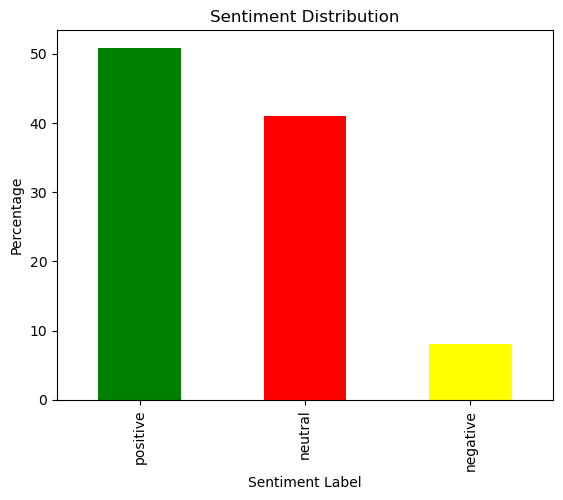

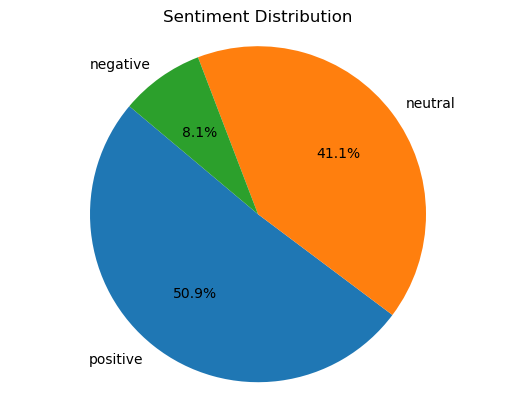

In [14]:
import pandas as pd

sentiment_counts = df['sentiment_label'].value_counts()  # Count occurrences of each sentiment label
sentiment_percentages = (sentiment_counts / len(df)) * 100  # Calculate percentages

print("Sentiment Distribution:")
print(sentiment_percentages)



import matplotlib.pyplot as plt

sentiment_percentages.plot(kind='bar', color=['green', 'red', 'yellow'])  # Colors for positive, negative, neutral
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Percentage")
plt.show()



plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct="%1.1f%%", startangle=140)  # Customize labels and starting angle
plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()


In [15]:
# Create a new 'category' column based on owner ID prefix 
df['category'] = df['owner_id'].str[:3]

# Now you can use 'category' for grouping
sentiment_by_category = df.groupby(['category', 'sentiment_label']).size().unstack()

df.head()


,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,cleaned_text,sentiment_label,category
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,im a brunch iced coffee girlie top ta3 x nazan...,positive,360
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,brow tip i really wish i would have know when ...,positive,360
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,omg i cant believe it already been 1 yr since ...,positive,360
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,90 glam wa pam makeup smashboxcosmetics og pri...,neutral,360
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,chiseled sculptured contour westmanatelier fac...,neutral,360


In [16]:
import pandas as pd

# Group data by category and sentiment label
sentiment_by_category = df.groupby(['category', 'sentiment_label']).size().unstack()

# Calculate percentages within each category (optional)
total_by_category = df.groupby('category').size()
#sentiment_by_category_pct = sentiment_by_category.apply(lambda x: x / total_by_category[x.name] * 100, axis=0)
sentiment_by_category_pct = sentiment_by_category.apply(lambda x: x / total_by_category.get(x.name, 0) * 100, axis=0)

# Print results 
print("Sentiment Distribution by Category (Counts):")
print(sentiment_by_category)


print("Sentiment Distribution by Category (Percentages):")
print(sentiment_by_category_pct)


Sentiment Distribution by Category (Counts):
sentiment_label  negative  neutral  positive
category                                    
100                   NaN      5.0      19.0
101                   NaN      7.0      16.0
102                   2.0     16.0      31.0
103                   2.0     14.0      22.0
104                   2.0     37.0      25.0
...                   ...      ...       ...
996                   4.0      NaN       8.0
997                   NaN      6.0      16.0
===                   NaN      1.0       NaN
>>>                   NaN      1.0       NaN
📸 @                   NaN      NaN       1.0

[477 rows x 3 columns]
Sentiment Distribution by Category (Percentages):
sentiment_label  negative  neutral  positive
category                                    
100                   NaN      inf       inf
101                   NaN      inf       inf
102                   inf      inf       inf
103                   inf      inf       inf
104                   inf 

Correlation Matrix:
            created_at  followers  following
created_at    1.000000   0.057117  -0.106657
followers     0.057117   1.000000  -0.007065
following    -0.106657  -0.007065   1.000000


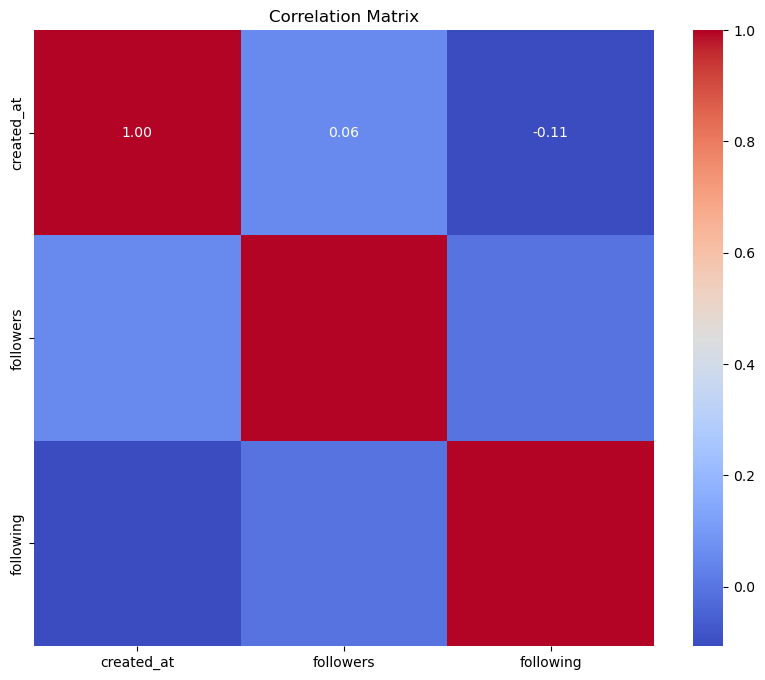

In [17]:
 #Exclude non-numeric columns
numeric_df1 = df.select_dtypes(include=['number'])

#  Calculate correlations between variables
correlation_matrix = numeric_df1.corr()

#  Print or visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [18]:
pip install Pylance

In [19]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import wordnet
import numpy as np

caption_text = df["cleaned_text"]
sentiment_labels = df["sentiment_label"]  

# Function to clean text 
def clean_text(text):
    """
    This function cleans text data by removing irrelevant characters, converting to lowercase,
    tokenizing, and applying lemmatization.

    Args:
        text (str): The text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    # Lowercase the text
    text = text.lower()

    # Remove special characters except for alphanumeric characters, spaces, and apostrophes
    text = re.sub(r"[^a-zA-Z0-9 \']", "", text)

    # Tokenize the text (split into words)
    tokens = word_tokenize(text)

    # Lemmatize each token (reduce words to their base form)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Clean captions
cleaned_text = [clean_text(text) for text in caption_text]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, sentiment_labels, test_size=0.2, stratify=sentiment_labels)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)  # Use transform instead of fit_transform

# Print the shape of TF-IDF features
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

# Choose a sentiment analysis model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the model with TF-IDF features
model.fit(X_train_tfidf, y_train)  # Train the model with TF-IDF features

# Make predictions on testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Save the model for future use
import joblib
joblib.dump(model, "sentiment_analysis_model.pkl")


Training data shape: (9353, 47500)
Testing data shape: (2339, 47500)
Accuracy: 0.8550662676357418
Precision: 0.8522056126499611
Recall: 0.8550662676357418
F1-score: 0.8457917219264873


['sentiment_analysis_model.pkl']